In [62]:
import random
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

In [2]:
cv = 3

In [5]:
def iterative_split_through_sorting_shuffle(df, n_splits, stratify_columns, random_state):
    """Custom iterative train test split which
    maintains balanced representation.
    """
    # Dataframe random row shuffle + sorting according to stratify_columns
    sorted = df.sample(frac=1, random_state=random_state).sort_values(stratify_columns)
    # for each fold, we take one row every n_splits rows
    folds = [sorted.iloc[i::n_splits, :] for i in range(n_splits)]
    # Further shuffling
    folds = [fold.sample(frac=1, random_state=random_state) for fold in folds]
    random.Random(random_state).shuffle(folds)
    return folds

In [55]:
list_auc = []
nb_el = 50
for _ in range(10000):
    df = pd.DataFrame(np.random.rand(nb_el,1), columns=["p"])
    df["label"] = (df.index < (len(df))/2).astype(int)
    list_auc.append(roc_auc_score(df.label, df.p))

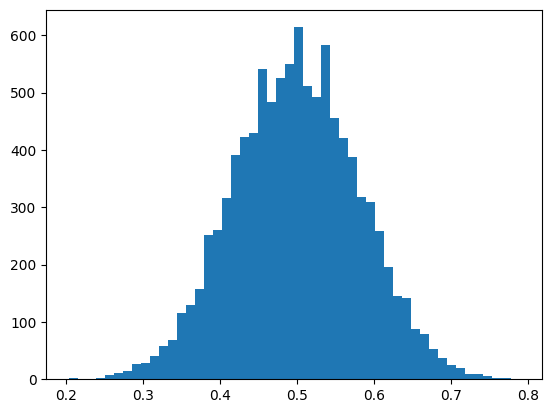

In [58]:
f = plt.hist(list_auc, bins=50)

In [59]:
nb_els = [5, 10, 15, 20, 30, 50, 100, 300, 1000, 3000, 10000, 20000, 40000]
nb_repet = 10000
quantile_95 = []
quantile_bonferroni = []
for nb_el in nb_els:
    print(nb_el)
    list_auc = []
    for _ in range(nb_repet):
        df = pd.DataFrame(np.random.rand(nb_el,1), columns=["p"])
        df["label"] = (df.index < (len(df))/2).astype(int)
        list_auc.append(roc_auc_score(df.label, df.p))
    quantile_95.append(np.quantile(list_auc, 0.95))
    quantile_bonferroni.append(np.quantile(list_auc, 1.-0.05/56))

5
10
15
20
30
50
100
300
1000
3000
10000
20000
40000


Text(0, 0.5, 'AUC 0.95-quantile')

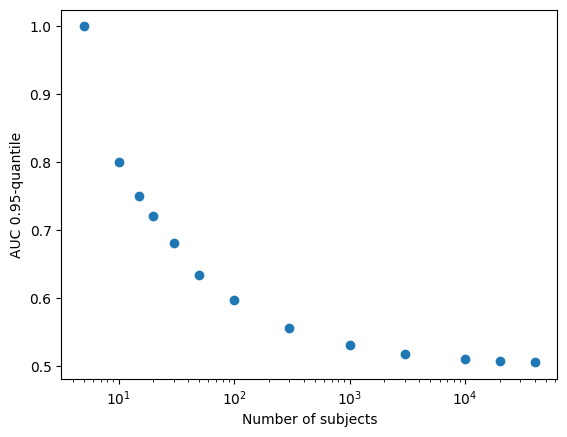

In [60]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(nb_els, quantile_95)
ax.set_xscale('log')
ax.set_xlabel('Number of subjects')
ax.set_ylabel('AUC 0.95-quantile')

Text(0, 0.5, 'AUC 0.95-bonferroni')

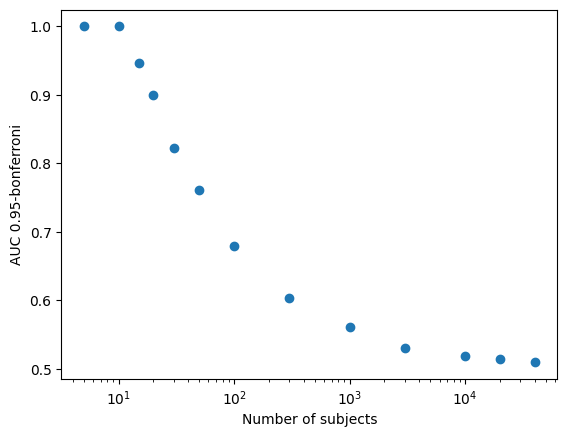

In [61]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(nb_els, quantile_bonferroni)
ax.set_xscale('log')
ax.set_xlabel('Number of subjects')
ax.set_ylabel('AUC 0.95-bonferroni')

In [236]:
# nb_els = [5, 10, 15, 20, 30, 50, 100, 300, 1000, 3000, 10000, 20000, 40000]
nb_els = [50]
nb_repet = 1000
quantile_95 = []
quantile_bonferroni = []
for nb_el in nb_els:
    print(nb_el)
    list_proba = []
    for _ in range(nb_repet):
        df = pd.DataFrame(np.random.rand(nb_el,1), columns=["estim"])
        df["label"] = (df.index < (len(df))/2).astype(int)
        df["estim"] = 0.2*df["label"] + df["estim"]
        X = df.estim
        X = sm.add_constant(X)
        model = sm.OLS(df.label, X)
        results = model.fit()
        list_proba.append(results.tvalues.estim)
    # quantile_95.append(np.quantile(list_auc, 0.95))
    # quantile_bonferroni.append(np.quantile(list_auc, 1.-0.05/56))

50


In [240]:
results.tvalues["estim"]

2.3579911690673425

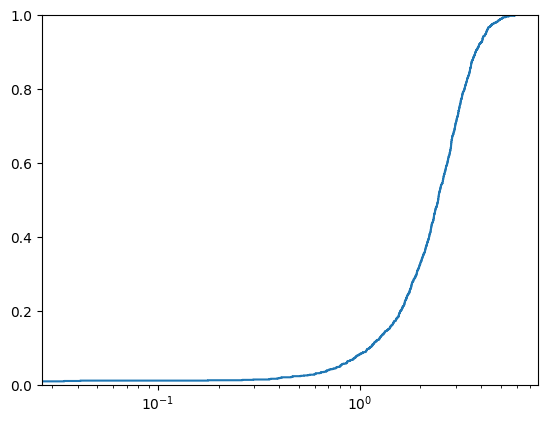

In [237]:
fig = plt.figure()
ax = plt.gca()
ax.ecdf(list_proba)
ax.set_xscale('log')
# ax.set_yscale('log')

In [164]:
results.summary()

/home/jc225751/Runs/70_self-supervised_two-regions/Program/venv_natif/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     34.17
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           0.000385
Time:                        17:22:49   Log-Likelihood:                 1.0535
No. Observations:                  10   AIC:                             1.893
Df Residuals:                       8   BIC:                             2.498
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3825      0.080      4.807      0.001       0.199       0.566
estim         -0.9018      0.154     -5.846      0.000      -1.258      -0.546
==============================================================================
Omnibus:                        1.527   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.466   Jarque-Bera (JB):                1.030
Skew:                           0.703   Prob(JB):                        0.597
Kurtosis:                       2.294   Cond. No.                         2.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
results.params.estim

-0.9018358140017368

In [166]:
results.tvalues

const    4.807093
estim   -5.845567
dtype: float64

In [167]:
results.pvalues.estim

0.00038470625921968577

In [ ]:
results.t_

In [173]:
print(results.t_test([0, 1]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.9018      0.154     -5.846      0.000      -1.258      -0.546
